<a href="https://colab.research.google.com/github/natelove02/Machine-Learning/blob/main/Love_hw1_programming_base_notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint

In [2]:
# Assignment Constants
RANDOM_STATE = 10
FIGSIZE = (12,8)
#### Use the following line before plt.plot(....) to increase the plot size ####
# plt.figure(figsize=FIGSIZE)

## Question 1
Use the breast cancer data set from Homework 0 to create a training set. Recall that the
label is 0 if the patient’s data indicates a malignant cancer and 1 otherwise. Compute the
base rate of malignant cancer occurrence over the entire data set. In other words, what would
be your best guess for the probability of malignant cancer of a single example using only the
labels in the training set? This question is very simple, so try not to overthink it.

In [3]:
training_set = load_breast_cancer() #load the built in cancer dataset
#print(training_set.DESCR) #print description for reminder of dataset
print(training_set.target.mean()) #generate base rate of cancer

0.6274165202108963


Based off of this mean produced above, I would predict about a 60% chance of malignant cancer if a tuor is present

## 2
The goal is to build a decision tree that, based on the other features in the set, predicts
whether or not a patient has malignant cancer. So this is a classification problem. Using
`tree.DecisionTreeClassifier` and other functions in the scikit-learn library, one can build
a decision tree and calculate both its training accuracy when fitted to the entire data set as
well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).
In this question you will need to complete two sub-components:
### (a)
(a) Make a plot visualizing the performance of a `tree.DecisionTreeClassifier` as you
search for an optimal `max_depth` parameter. Vary the depth of your decision tree using
max depth = 1,2,. . . ,10 and record the results from the following evaluation procedures
for each setting:
* The accuracy when training and testing on the full dataset.
* 10-fold cross-validated accuracy.

Plot the results of both evaluation procedures on the same plot with evaluation scores on
the y-axis and max depth values on the x-axis. Use 10 as your random seed/state for the
decision tree and the cross-validation. Use a legend to label both evaluation procedures.


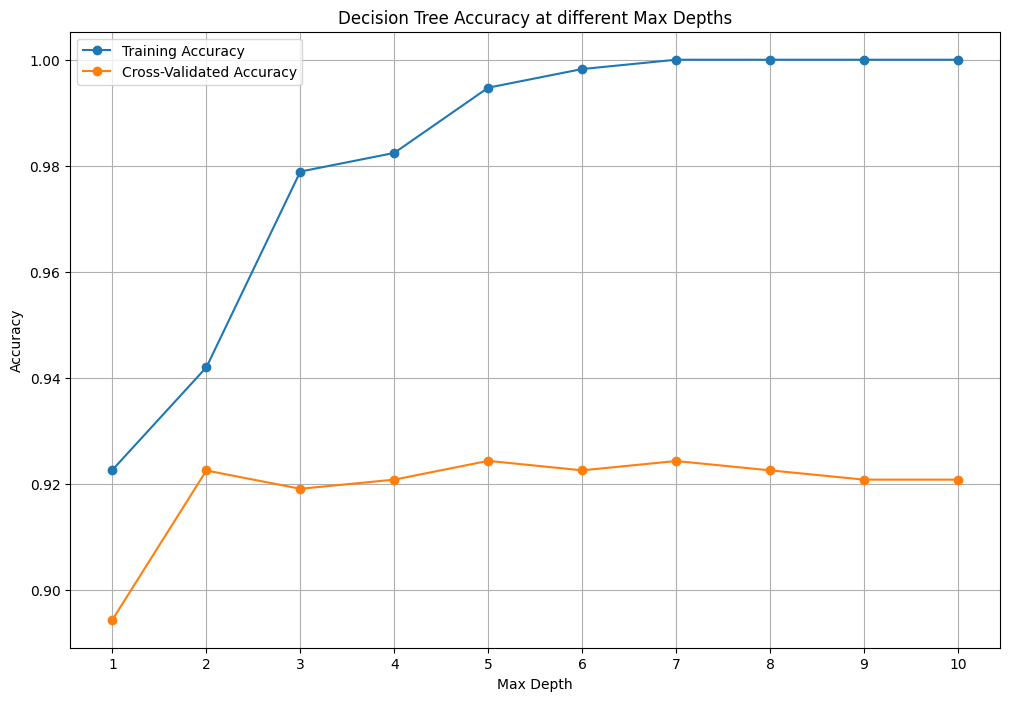

In [4]:
max_depths = np.arange(1,11) #create range of max depths
cv = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True) #create KFold as given in HW1. Chose splits to be 10
#empty lists to store results in to plot later
train_scores = []
cv_scores = []
#loop through every max depth and do cross validation and training and testing on full dataset
for depth in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = depth, random_state=RANDOM_STATE) #create decision tree
  #train the decision tree, record its accuracy, and store it for plotting
  clf.fit(training_set.data, training_set.target)
  training_accuracy = clf.score(training_set.data, training_set.target)
  train_scores.append(training_accuracy)
  #score cross validation and store it for plotting
  scores = cross_val_score(clf, training_set.data,training_set.target, cv = cv)
  cv_scores.append(scores.mean())
#create plot
plt.figure(figsize=FIGSIZE)
plt.plot(max_depths, train_scores,marker ='o', label = "Training Accuracy")
plt.plot(max_depths, cv_scores,marker ='o', label = "Cross-Validated Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy at different Max Depths")
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()

### (b)
Answer the questions below based on the results of 2a. Write your answers in the
corresponding field in the markdown cell that is present in the HW1 template notebook.
Do this by double clicking the markdown cell and writing your answer directly in the
cell. Pressing enter will re-render the markdown.

#### (i.)
What setting of `max_depth` gave the best accuracy w.r.t. the **full-dataset** accuracy?
If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** The best accuracy was when Max Depth >= 7. At this point and from this point on the accuracy remained at 1.00.

#### (ii.)
What setting of `max_depth`  gave the best accuracy w.r.t. the **cross-
validated** accuracy? If more than one setting equaled the best accuracy, list each of the best settings.

**Student answer here:** The most accurate cross-validated accuracy was at max depth 5 and 7, but generally the accuracy remained similar once Max Depth > 1. The accuracy decreased slightly after Max Depth > 8 as well, so a max depth of 7 might be the best to use for cross-validation and full-dataset accuracy.



## 3\.
This question explores random forest classifiers by using scikit-learn’s `ensemble.RandomForestClassifier`.
You will make two plots and answer questions about them.

### (a)
For the first plot, use a `ensemble.RandomForestClassifier` and the best depth you
found 2(b)ii as `max_depth`. We will now find the optimal setting of a second parameter,
n estimators. Vary the number of trees in the forest via the parameter `n_estimators`
and plot its 10-fold cross-validated accuracy (use `n_estimators` = 1, 2, . . . , 20). Again,
use 10 as your random seed for your classifier and cross-validation.

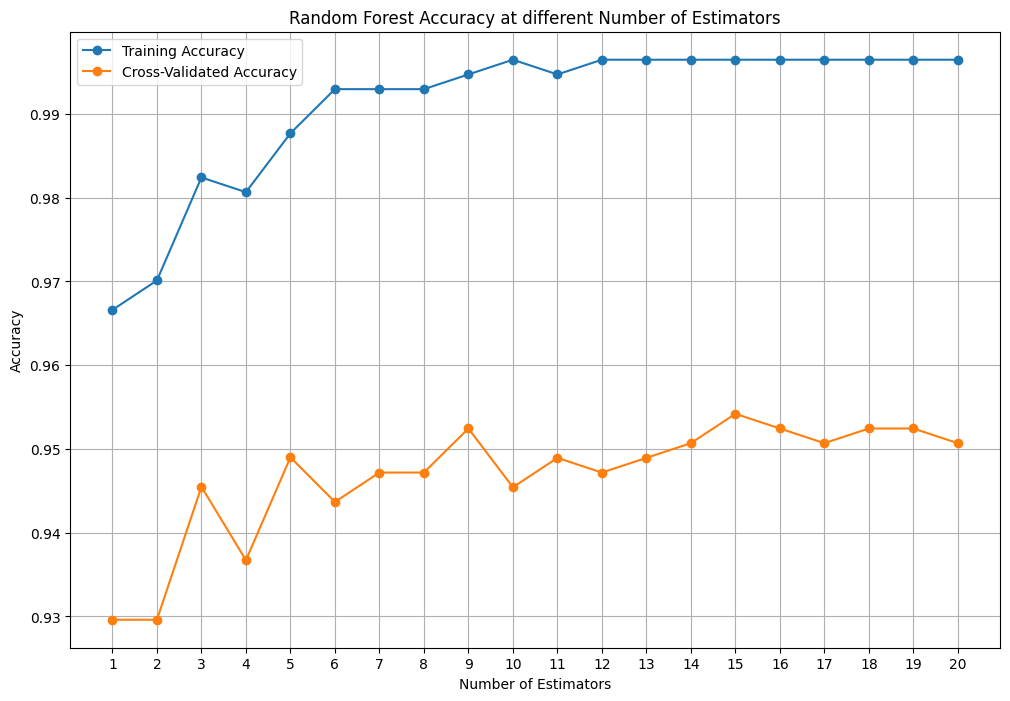

In [5]:
depth = 7 #best depth from part 2
n_estimators = np.arange(1,21) #create range of n_estimators
forest_training_scores = []
forest_cv_scores = []
#loop through every max depth and do cross validation and training and testing on full dataset
for n in n_estimators:
  rclf = ensemble.RandomForestClassifier(n_estimators = n, max_depth = depth, random_state=RANDOM_STATE)
  rclf.fit(training_set.data, training_set.target)
  training_accuracy = rclf.score(training_set.data, training_set.target)
  forest_training_scores.append(training_accuracy)
  scores = cross_val_score(rclf, training_set.data,training_set.target, cv = cv)
  forest_cv_scores.append(scores.mean())
plt.figure(figsize=FIGSIZE)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy at different Number of Estimators")
plt.xticks(n_estimators)
plt.plot(n_estimators, forest_training_scores, marker ='o', label = "Training Accuracy")
plt.plot(n_estimators, forest_cv_scores, marker ='o', label = "Cross-Validated Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### (b)
Do you see an improvement using random forests versus using a single tree? (Note: use
the `n_estimators`=1 result as the result for a single tree.)

**Student answer here:** Yes, there is about a .07 imrpovement in accuracy in the random forest.

### (c)
What setting of `n_estimators` gave the best accuracy w.r.t. the cross-validated ac-
curacy?

**Student answer here:** n=15 gives the best result w.r.t cross-validated accuracy.

### (d)
For the second plot, again use a `ensemble.RandomForestClassifier`, but this time
you will fix the `n_estimators` parameter and again attempt to find the optimal setting
of a `max_depth`. Use your answer to 3c as the setting for `n_estimators` and follow the
procedure from 2a to find the best setting for max depth. This time, only plot the results
from cross-validation and not the full set, but the plot should be the same structure
as in 2a otherwise (use `max_depth` = 1,2,. . . ,10). Again, use 10 as your random seed.

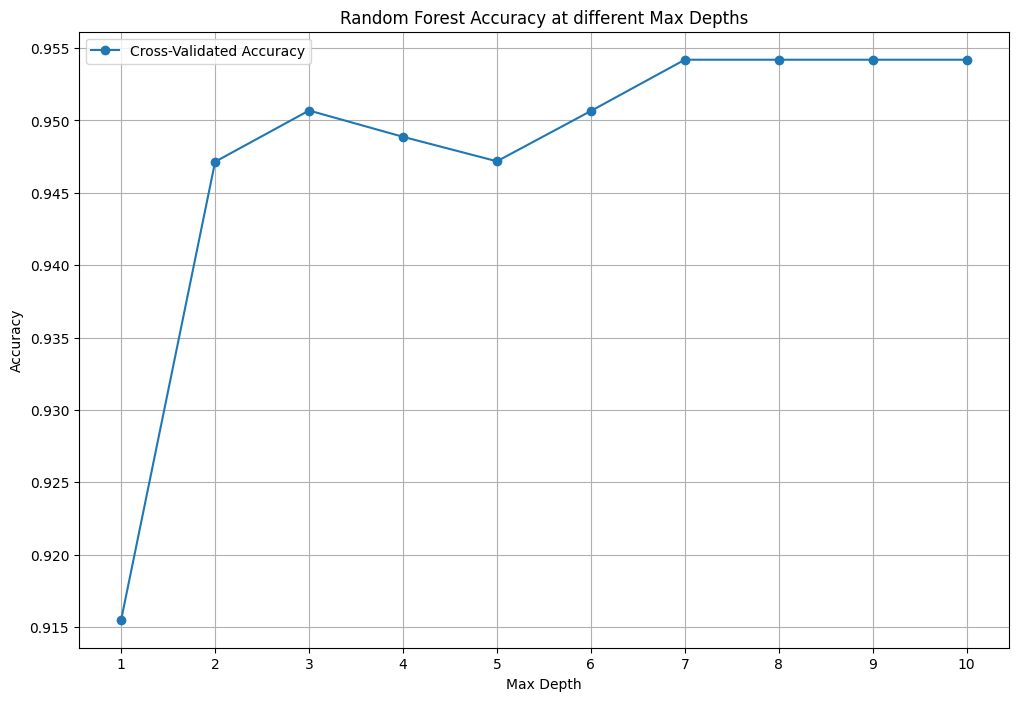

In [6]:
max_depths = np.arange(1,11) #create range of max depths
cv = KFold(n_splits=10, random_state=RANDOM_STATE, shuffle=True) #create KFold as given in HW1. Chose splits to be 10
#empty lists to store results in to plot later
n_estimators = 15
forest2_train_scores = []
forest2_cv_scores = []

for depth in max_depths:
  rclf2 = ensemble.RandomForestClassifier(n_estimators = n_estimators, max_depth = depth, random_state=RANDOM_STATE)
  rclf2.fit(training_set.data, training_set.target)
  training_accuracy2 = rclf2.score(training_set.data, training_set.target)
  forest2_train_scores.append(training_accuracy)
  scores = cross_val_score(rclf2, training_set.data,training_set.target, cv = cv)
  forest2_cv_scores.append(scores.mean())


plt.figure(figsize=FIGSIZE)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy at different Max Depths")
plt.xticks(max_depths)
plt.plot(max_depths, forest2_cv_scores, marker ='o', label = "Cross-Validated Accuracy")
plt.legend()
plt.grid(True)
plt.show()

### (e)
In the plot in 3d, is the optimal setting of `max_depth` the same as in 2(b)ii? If not, what
is the new optimal setting of `max_depth`?

**Student answer here:** Yes, the optimal setting is still Max Depth >= 7

## 4\.
For this last question, we will explore the dependability of our estimates.
### (a)
Make a plot using the following procedure:
#### i.
Using random state values from 0, 1, · · · , 99 calculate the 10-fold cross-validation
accuracy of different `tree.DecisionTreeClassifiers` with max depth settings from
1, 2, · · · , 10.
As before, you should use the same random state value for your classifier and cross-validation.
#### ii.
Then record the best max depth settings for each random state. Be sure to check whether multiple settings
achieve the best accuracy.


Plot the counts for the best max depth settings as a bar chart with the max depth settings on the x-axis and the 'best parameter counts' on the y-axis (number of times that parameter was selected as the best max depth setting).

*Note*: this calculation might take some time. For debugging, try a smaller range of
random states.

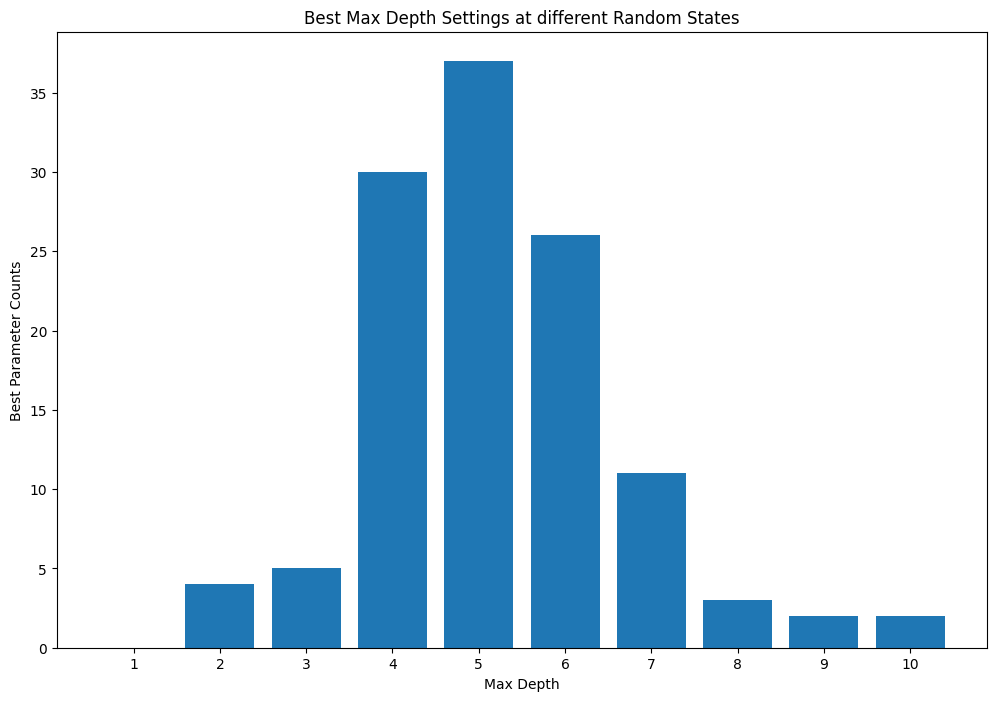

In [9]:
max_depths = np.arange(1,11) #create range of max depths
random_state2 = np.arange(0,100) #create range of random states
#train2_scores = []
#cv2_scores = []
#best_depths = []
best_depth_dict = {i: 0 for i in range(1, 11)}
#loop through every max depth and do cross validation and training and testing on full dataset
for rand in random_state2:
  cv = KFold(n_splits=10, random_state=rand, shuffle=True) #create KFold as given in HW
  curr_scores = {}
  cv2_scores = []
  for depth in max_depths:
    clf = tree.DecisionTreeClassifier(max_depth = depth, random_state=rand) #create decision tree
    #train the decision tree, record its accuracy, and store it for plotting
    clf.fit(training_set.data, training_set.target)
    #training_accuracy = clf.score(training_set.data, training_set.target)
    scores = cross_val_score(clf, training_set.data,training_set.target, cv = cv)
    cv2_scores.append(scores.mean())

  best_depth = max(cv2_scores)
  for currindex, score in enumerate(cv2_scores):
    if score == best_depth:
      actual_best_depth = currindex + 1
      best_depth_dict[actual_best_depth] += 1

x = list(best_depth_dict.keys())
y = list(best_depth_dict.values())
plt.figure(figsize=FIGSIZE)
plt.bar(x,y)
plt.xlabel('Max Depth')
plt.ylabel('Best Parameter Counts')
plt.title('Best Max Depth Settings at different Random States')
plt.xticks(x)
plt.show()

### (b)
What are the top two most frequent parameter settings?

**Student answer here:** 5 and 4